# Question 1
Using Seaborn iris dataset for pair plots.

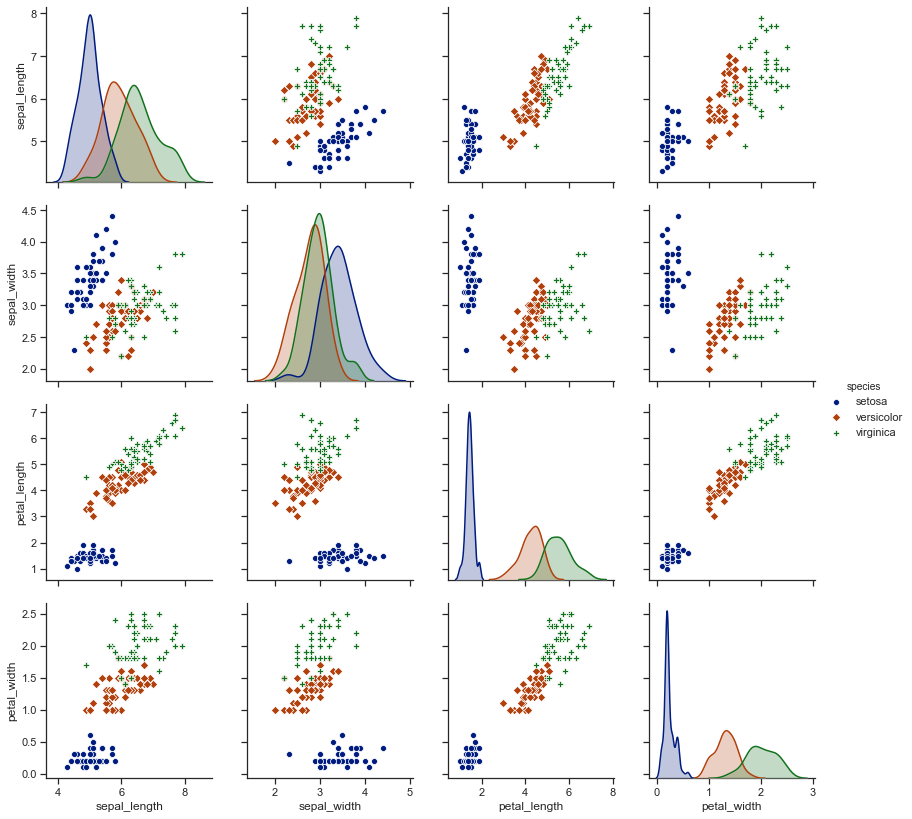

In [100]:
# importing required modules
import seaborn as sbn

#loading iris dataset to iris variable
iris=sbn.load_dataset('iris')
#setting axis style to ticks
sbn.set(style='ticks')
#sbn.pairplot(iris)

#setting color and the darkness of the graph
sbn.set_palette("dark", n_colors=3, desat=1)

#Plotting the pair plots for iris data using the 4 features and differnt markers for each species
sbn.pairplot(iris,hue='species',markers=['o','D','P'],height=2.9)

# Analysis of pairs plots

•	From the above pair plots, it can be inferred that setosa is linearly separable from the other two species versicolor and virginica. Any two features can be selected to linearly separate setosa from others.

•	It can be observed that irrespective of the features selected, versicolor and virginica are partially linearly separable. The data points are more scattered, if the selected features are sepal_length and sepal_width.

•	In order to classify the above species, we can opt of for any set of features except sepal_length and sepal_width together,in whose plot data points oof species are more scattered accross others.

•	When we consider the histograms accross the daigonal of the above pair plot,we can observe that setosa can be still linearly separable using any one of the feature petal_width or petal_length.But when considered any of this feature ,versicolor and virginica are partially linearly separable.

•	If the selected feature is either sepal_length or sepal_width ,the 3 species are partially linear separable as their data points are scattered over other species data points.

References :

Ref : https://seaborn.pydata.org/generated/seaborn.pairplot.html

Ref : https://seaborn.pydata.org/tutorial/distributions.html

# Question 2: KNN
Using the Sklearn KNeighborsClassifier for classifying the iris dataset.

Here at first the algorithm is trained with train data and tested with validation data set for selecting optimum K value for getting high accuracy.

Atlast KNN is trained using the above obatined optimum K value and accuracy for the test data is caluclated. 

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Ref :http://scott.fortmann-roe.com/docs/BiasVariance.html

Validation set accuracy score for KNN algorithm using K= 1 is 0.9
Validation set accuracy score for KNN algorithm using K= 5 is 0.9333333333333333
Validation set accuracy score for KNN algorithm using K= 10 is 0.9333333333333333
Validation set accuracy score for KNN algorithm using K= 15 is 0.9333333333333333
Validation set accuracy score for KNN algorithm using K= 20 is 0.9333333333333333
Validation set accuracy score for KNN algorithm using K= 25 is 0.9666666666666667
Validation set accuracy score for KNN algorithm using K= 30 is 0.9666666666666667
Validation set accuracy score for KNN algorithm using K= 35 is 0.9333333333333333


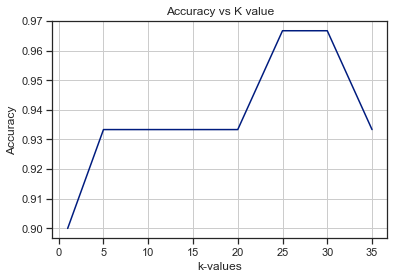

In [101]:
# importing required modules 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# loading iris data to a variable
iris=load_iris()

#splitting the data into required data sets of train(60%),validation(20%) and test(20%) using random_state=42

train_val_x,x_test,train_val_y,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(train_val_x,train_val_y,test_size=0.25,random_state=42)

#checing whether the data sets are devided as required
#print(x_train.shape)
#print(x_val.shape)
#print(x_test.shape)   

#array for storing the the K values and their respective accuracies
accuracy_values=[]

# Values of K for which the accuracies has to be caluclated
ki=[1,5,10,15,20,25,30,35]

# training the classifier with different k-values and measuring the accuracy of the trained model for different K-values
# using KNN classifier
for x in ki:
    #training KNN with train data
    knn = KNeighborsClassifier(n_neighbors=x).fit(x_train,y_train)
    #caluclating the accuracy score of predicting the validation set results
    accuracy=accuracy_score(y_val,knn.predict(x_val))
    #stroing the K value and its respective accuracy in accuracy_values array
    accuracy_values.append([x,accuracy])

for x in accuracy_values :
    print("Validation set accuracy score for KNN algorithm using K= {0} is {1}".format(x[0],x[1]))
    
#converting accuracy_values array to numpy array for plotting the grah using matplotlib
accuracy_values=np.array(accuracy_values)
plt.ylabel('Accuracy')
plt.xlabel('k-values')
plt.plot(accuracy_values[:,0],accuracy_values[:,1])
plt.title("Accuracy vs K value")
plt.grid()

# Choosing Optimum K-Value

•	From the graph obtained above,it can be observed that maximum accuracy is given by the KNN model when K=25 and k=30.

•	selecting K=25 as the optimum K value.

    Reasons :
    
    • Select K value as 25, as it is an odd value and preferred when data to be classified has even number of classes.
    
    • K=25 makes the optimization converge faster than K=30 and is large enough to avoid the noise data of the dataset.
    
    • Larger the K value larger is the computational expense.

In [102]:
# training the model using selected K value i.e. 25 and testing the accuracy of calssification for test data

knn = KNeighborsClassifier(n_neighbors=25).fit(x_train,y_train)
accuracy_score_test=accuracy_score(y_test,knn.predict(x_test))

print("The accuracy obtained for the test data using KNN,when selected K=25 is: {0}".format(accuracy_score_test))

The accuracy obtained for the test data using KNN,when selected K=25 is: 1.0


#### The accuracy obtained for the test data using KNN model,when selected K=25 is: 1.0

# Question 3: SVM
Using Sklearn linear SVM classifies(kernel="linear") for callisifying the iris data set.

The IRIS data set is divided into train_validation(80%) and test set(20%).

To find the optimum C value,we have first trained linear SVM model for different values and obtained mean accuracy scores using 10-fold cross validation scheme.

Later liner SVM model is trained using the optimum select C value i.e '5' and the accuracy for the test data set is caluclated.

References :

SVM model : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

cross val score Ref : https://scikit-learn.org/stable/modules/cross_validation.html

Choosing C value 

Ref : https://github.com/scikit-learn/scikit-learn/issues/7955

Ref : https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

Ref : https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

Validation set mean accuracy score for C= 0.1 is 0.9575757575757576
Validation set mean accuracy score for C= 0.5 is 0.9666666666666666
Validation set mean accuracy score for C= 1 is 0.9666666666666666
Validation set mean accuracy score for C= 2 is 0.9666666666666668
Validation set mean accuracy score for C= 5 is 0.9666666666666668
Validation set mean accuracy score for C= 10 is 0.9666666666666668
Validation set mean accuracy score for C= 20 is 0.9423076923076923
Validation set mean accuracy score for C= 50 is 0.933974358974359


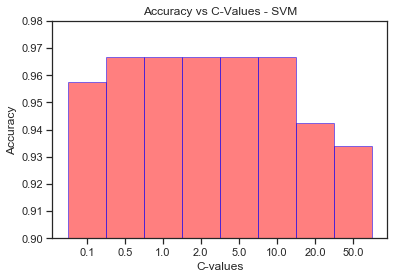

In [103]:
# importing required modules 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

iris=load_iris()

#splitting the data into required data sets of train_validation(80%) and test(20%) using random_state=42
train_val_x,x_test,train_val_y,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)

#array for storing the the C values and their respective mean accuracies
accuracy_c=[]

c_Values = [0.1, 0.5, 1, 2, 5, 10, 20, 50]

for x in c_Values :
    lin_svc = svm.SVC(kernel='linear',C=x)
    scores=cross_val_score(lin_svc, train_val_x, train_val_y, cv=10)
    #print(scores)
    #print(scores.mean())
    accuracy_c.append([x,scores.mean()])

for x in accuracy_c :
    print("Validation set mean accuracy score for C= {0} is {1}".format(x[0],x[1]))
    

#converting accuracy_values array to numpy array for plotting the grah using matplotlib and plotting the graph
accuracy_c=np.array(accuracy_c)
# Changing datset to required format to plot bar graph
bars = accuracy_c[:,0]
y_pos = np.arange(len(bars))
 
# plotting bar graph
plt.ylabel('Accuracy')
plt.xlabel('C-values')
plt.ylim((0.9,0.98))
plt.title("Accuracy vs C-Values - SVM")
plt.bar(y_pos,accuracy_c[:,1],alpha=0.5,width=1,edgecolor='blue',color='red')
plt.xticks(y_pos, bars)
plt.show()

# Choosing Optimum C-Value

•	C is a trade-off between training error and solution flatness. The higher the C the less will be the final training error.

•	 C actually determines how much penalty would you give for misclassification. And the optimization is a mininmization and hence, a large value would overfit the model and take it away from generalization.

•	For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

•	Hence choosing a C value that gives the highest mean accuracy along with avoiding high penalties by choosing a small values or small margings by selecting very high value.

•	From the above graph,there are multiple C values that give mean accuracy of 0.966,So the selected C value is 5.

In [104]:
lin_svc = svm.LinearSVC(C=5,dual=False).fit(train_val_x, train_val_y)

predicted=lin_svc.predict(x_test)
accuracy_score(y_test,predicted)

print("The accuracy obtained for the test data using linear SVM,when trained with selected C=5 is: {0}".format(accuracy_score(y_test,predicted)))

The accuracy obtained for the test data using linear SVM,when trained with selected C=5 is: 1.0


#### The accuracy obtained for the test data using linear SVM,when trained with selected C=5 is: 1.0

# Question 4: Tree-based Classifiers

In [105]:
#importing required modules
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import numpy as np
import pandas as pd

#loading iris dataset
iris = load_iris()
#splitting the data into required data sets of train_validation(80%) and test(20%) using random_state=42
train_val_x,x_test,train_val_y,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)
#max_depth values to be used for training 
depth = [3,5,10,None]
#trees values to be used for training
trees=[5,10,50,150,200]

### Decision Tree Classifier

Using sklearn DecisionTreeClassifier to classify the iris dataset.

At first using the train_val data set the model is trained for multiple max_depth values and mean accuracies are caluclated using 10-fold cross validation scores.

Later the Decision Tree model is trained with the select optimum depth value and the accuracy for the test data is reported.

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Ref : https://scikit-learn.org/stable/modules/tree.html

Mean Accuracy obtained using Decision Tree with max_depth: 3 is 0.9332167832167831
Mean Accuracy obtained using Decision Tree with max_depth: 5 is 0.908216783216783
Mean Accuracy obtained using Decision Tree with max_depth: 10 is 0.9248834498834497
Mean Accuracy obtained using Decision Tree with max_depth: None is 0.9248834498834497


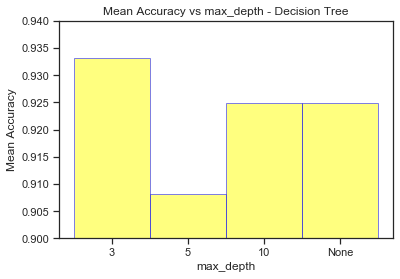

In [106]:
#array to store max_depth and its respected mean accuracy
mean_accuracy_descision=[]

#cross validatingg the mean scores for multile max_depth using 10=fold cross validation scores
for x in depth :
    clf = tree.DecisionTreeClassifier(random_state=42,max_depth=x)
    scores=cross_val_score(clf, train_val_x, train_val_y, cv=10)
    mean_accuracy_descision.append([x,scores.mean()])
    print("Mean Accuracy obtained using Decision Tree with max_depth: {0} is {1}".format(x,scores.mean()))

#plotting graph of mean accuracies vs max_depth 
mean_accuracy_descision=np.array(mean_accuracy_descision)
bars = mean_accuracy_descision[:,0]
y_pos = np.arange(len(bars))
 
# plotting bar graph
plt.ylabel('Mean Accuracy')
plt.xlabel('max_depth')
plt.ylim((0.9,0.94))
plt.title("Mean Accuracy vs max_depth - Decision Tree")
plt.bar(y_pos,mean_accuracy_descision[:,1],alpha=0.5,width=1,edgecolor='blue',color='yellow')
plt.xticks(y_pos, bars)
plt.xticks(np.arange(4), ('3', '5', '10', 'None'))
plt.show()

###  Choosing best Max_depth for Decision Tress Classifier :

•	From the above bar chart of Mean acccuracy vas max_depth ,we can observe that the mean accuracy of the model is highest when the selected max_depth value is '3'.

•	As there is only one vale which gives highest accuracy ,we are choosing the max_depth as '3'.

In [107]:
#training the model with selected best max_Depth value and reporting the accuracy for test data.
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=3).fit(train_val_x,train_val_y)
test_accuracy=clf.score(x_test,y_test)
print("The accuracy obtained for test data using  Decision Tress Classifier,when trained with selected max_depth=3 is: {0}".format(test_accuracy))

The accuracy obtained for test data using  Decision Tress Classifier,when trained with selected max_depth=3 is: 1.0


#### The accuracy obtained for test data using  Decision Tress Classifier,when trained with selected max_depth=3 is: 1.0

### Random Forest Classifier

Using sklearn RandomForestClassifier to classify the iris dataset.

At first using the train_val data set the model is trained for multiple max_depth and trees values and mean accuracies are caluclated using 10-fold cross validation scores.

Later the Random Forest model is trained with the select optimum depth and tree value and the accuracy for the test data is reported.

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Ref : https://scikit-learn.org/stable/modules/tree.html

Ref : https://seaborn.pydata.org/generated/seaborn.heatmap.html

Ref : https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

Ref : https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

Mean Accuray score when depth=3 and num of tress=5 is : 0.9248834498834497
Mean Accuray score when depth=3 and num of tress=10 is : 0.9332167832167831
Mean Accuray score when depth=3 and num of tress=50 is : 0.9415501165501163
Mean Accuray score when depth=3 and num of tress=150 is : 0.9415501165501163
Mean Accuray score when depth=3 and num of tress=200 is : 0.9415501165501163
Mean Accuray score when depth=5 and num of tress=5 is : 0.9248834498834497
Mean Accuray score when depth=5 and num of tress=10 is : 0.9248834498834497
Mean Accuray score when depth=5 and num of tress=50 is : 0.9415501165501163
Mean Accuray score when depth=5 and num of tress=150 is : 0.9332167832167831
Mean Accuray score when depth=5 and num of tress=200 is : 0.9332167832167831
Mean Accuray score when depth=10 and num of tress=5 is : 0.9248834498834497
Mean Accuray score when depth=10 and num of tress=10 is : 0.9248834498834497
Mean Accuray score when depth=10 and num of tress=50 is : 0.9332167832167831
Mean Acc

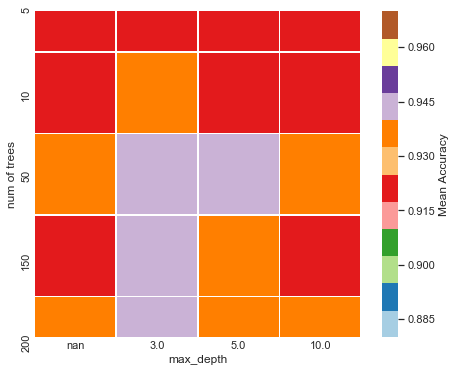

In [108]:
#arrays to store score,depth,tress values in pairs for graphs 
scor=[]
dep=[]
tree=[]
#training the model for different max_Depth and num of trees and storing the mean accuracies.
for x in depth :
    for y in trees:
        clf=RandomForestClassifier(max_depth=x, random_state=42,n_estimators=y)
        scores=cross_val_score(clf, train_val_x, train_val_y, cv=10)
        print("Mean Accuray score when depth={0} and num of tress={1} is : {2}".format(x,y,scores.mean()))
        scor.append(scores.mean())
        dep.append(x)
        tree.append(y)


titles = ['tree', 'dep', 'scor']

data = pd.DataFrame(data={'num of trees':tree,'max_depth':dep,  'mean accuracy score':scor})
data = data.pivot('num of trees','max_depth','mean accuracy score')
plt.figure(figsize = (7.5,6))
ax=sns.heatmap(data,linewidths=.5,square=True,vmin=0.88, vmax=0.97,cmap='Paired',cbar_kws={'label': 'Mean Accuracy'})
ax.tick_params(axis='both', which='both', length=0)

#####  Choosing best Max_depth for Decision Tress Classifier :

•	From the above heat plot and mentioned results ,we can observe that maximum mean accuracy occurs when the n_esitimatirs value is greater than or equal to 50 and when the max_depth is either 3 or 5.

•	n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

•	max_depth : represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. Here the maximum value of max_depth which gives highest mean accuracy is '5'.
Hence selecting max_depth as '5'.

•   Usually the higher the number of trees the better to learn the data.In order to avoid high caluclation expense,we can select the number of tress value as '50' ,which is the only combination along with max depth '5' gives the max mean accuracy.

•	Hence the selected optimum hyperparameter values are max_depth=5 and number of tress=50.

In [109]:
# training the model with selected best hyperparameters and caluclating the accuracy for tes data.
clf=RandomForestClassifier(max_depth=5, random_state=42,n_estimators=50).fit(train_val_x,train_val_y)
test_accuracy=clf.score(x_test,y_test)
print("The accuracy obtained for test data using Random Forest Classifier,when trained with selected max_depth=5 & num of trees=50 is: {0}".format(test_accuracy))

The accuracy obtained for test data using Random Forest Classifier,when trained with selected max_depth=5 & num of trees=50 is: 1.0


#### Aaccuracy obtained for test data using Random Forest Classifier,when trained with selected max_depth=5 & num of trees=50 is: 1.0

### Gradient Tree Boosting

Using sklearn Gradient Tree Boosting Model to classify the iris dataset.

At first using the train_val data set the model is trained for multiple estimators and mean accuracies are caluclated using 10-fold cross validation scores.

Later the Gradient Tree Boosting Model is trained with the select optimum depth value and the accuracy for the test data is reported.

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Ref : https://scikit-learn.org/stable/modules/tree.html

Ref : https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

Ref : https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

Mean Accuray score when n_estimators=5 is : 0.9325757575757574
Mean Accuray score when n_estimators=10 is : 0.9325757575757574
Mean Accuray score when n_estimators=50 is : 0.9248834498834497
Mean Accuray score when n_estimators=150 is : 0.9165501165501164
Mean Accuray score when n_estimators=200 is : 0.9165501165501164


(0.91, 0.94)

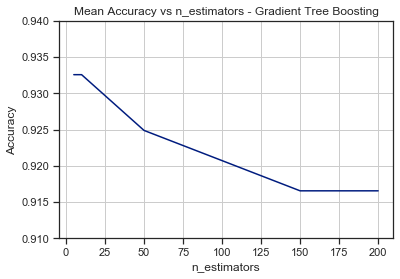

In [110]:
# array to store mean accuracies 
accuracy_mean_gradient=[]

#training the model for different number of estimators and storing the accuracy values 
for y in trees:
    clf=GradientBoostingClassifier(random_state=42,n_estimators=y)
    scores=cross_val_score(clf, train_val_x, train_val_y, cv=10)
    print("Mean Accuray score when n_estimators={0} is : {1}".format(y,scores.mean()))
    accuracy_mean_gradient.append([y,scores.mean()])

#plotting graph of mean accuracy vs n_estimator
accuracy_mean_gradient=np.array(accuracy_mean_gradient)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.title("Mean Accuracy vs n_estimators - Gradient Tree Boosting")
ax=plt.plot(accuracy_mean_gradient[:,0],accuracy_mean_gradient[:,1])
plt.grid()
plt.ylim((0.91,0.94))

#####  Choosing best n_estimators for Gradient Boosting Tree Classifier :

•	From the above plot and mentioned results ,we can observe that maximum mean accuracy occurs when the n_esitimatirs value is 5 or 10.

•	n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.


•   Usually the higher the number of trees the better to learn the data.In order to avoid high caluclation expense,we can select the number of tress value as '10' ,which is the highest number of estimators that gives the max mean accuracy.

•	Hence the selected optimum hyperparameter value is n_estimator=10.

In [111]:
clf=GradientBoostingClassifier(random_state=42,n_estimators=10).fit(train_val_x,train_val_y)
test_accuracy=clf.score(x_test,y_test)
print("The accuracy obtained for test data using Gradient Tree Boosting Classifier,when trained with selected n_estimators=10 is: {0}".format(test_accuracy))

The accuracy obtained for test data using Gradient Tree Boosting Classifier,when trained with selected n_estimators=10 is: 1.0


#### The accuracy obtained for test data using Gradient Tree Boosting Classifier,when trained with selected n_estimators=10 is: 1.0

# Question 5: Analysis

### 1. Explain why you had to split the dataset into train and test sets?

In Machine Learning, we make a model which is nothing but an algorithm ,which runs on some parameters.This parameters has to be tuned ,so as to make model efficient for real time applications.

The model can be trained using data that we call as training data or training set.The training data is the one that already has the actual values that the model should have predicted and thus the algorithm changes the value of parameters to account for the data in the training set.

But how do we know that the model is generally good after training?

We have test data / test set for that, which is basically a different data for which we know the values, but this data was never previously shown to the model.So if the model also performs well on test set after training then we can say that the model we developed is good.

If the model is not tested and made to perform well on training data, then parameters will be such that they are only good enough to predict the data value in the training set. It's not the actual use of the model.

Hence we devide data into two sets training and test data sets.

### 2. Explain why when finding the best parameters for KNN you didn't evaluate directly on the test set and had to use a validation test.

Number of neighbors to be used by kneighbors queries in KNN algorithm is by default 5.

When the model is trained using default parameters, the K neighbours that the model chooses is 5 ,which might not be a good choice .A very low K value is very pron to noise data and a very high K value is baised for high probable data.

In order to avoid the model to be baised/faulty based on default K=5 value,we need to select the appropriate K value to train over model for the data set we posses.

We devide the data into 3 parts in such case - train,validation and test.We use the train set to train the model for different K values and in order to know the accuracy or the effect of K value on the model we use validation data to measur the accuracies for different K values.This validation was not shown to the model at training stage,so this is to validate a real time senairo.

After measing accuracies for different K values,the K value which gives high accuracy can we selected and the overall performance of model in reatime application can be mock tested using test data set.


### 3. What was the effect of changing k for KNN. Was the accuracy always affected the same way with an increase of k? Why do you think this happened?

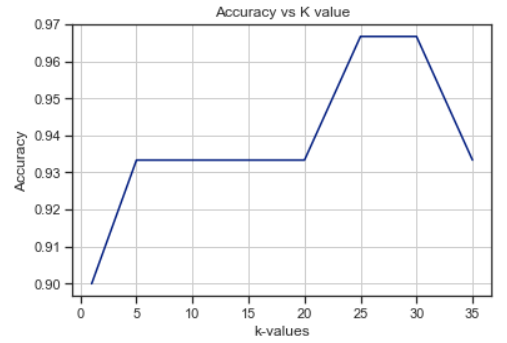

From the above graph we can observe that, by varing K value the accuracy of the model changes.

With very low value we can see that the model was prone to noise data ,which lead to low accuracy of the model.When the K value is increased ,the accuracy tends to increase till the value is 30 and then dropped for K=35.

With very high K value,the results are biased when the data of a particular class is densly populated and the sample of other class which is sparesly populated needs to be predicated for labeling.

As the algorithm checks for K nearest neighbours,high density graph gives more neighbours than the other classes,which leads to miscalssification of sample.Hence the decrease in accuracy for high K values.

### 4. What was the relative effect of changing the max depths for decision tree and random forests? Explain the reason for this.

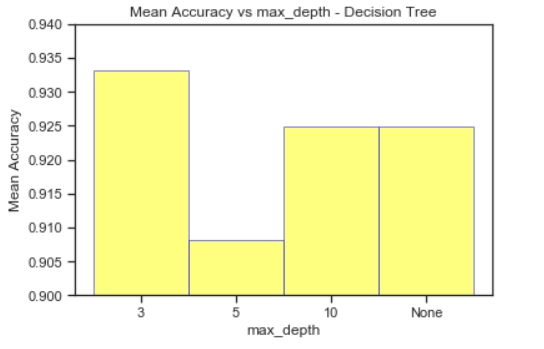

From the above graph of Mean accuracy vs max_depth of Descision tree ,it can be observed that the accuracy of the model is maximum when the nmax_depth=3.

With the increase in value from 3 to 5 made the accuracy reeduce ,as limiting the number of branches might have effected the descion making of algorithm like making ambigious descions.

We can also abserve that when the max_depth is either 10 or None((grow until the end) having same accuracy indicates that there might be a chance that the max_depth has never crossed 10.There is a slight increase in the accuracy ,when compared to depth 5,as more depth facilitates more divisions for decision making.

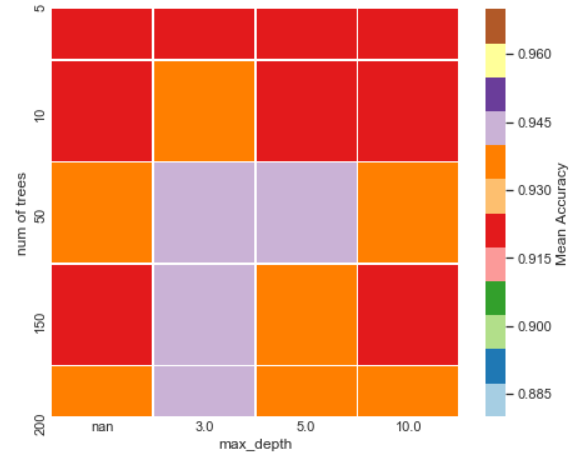

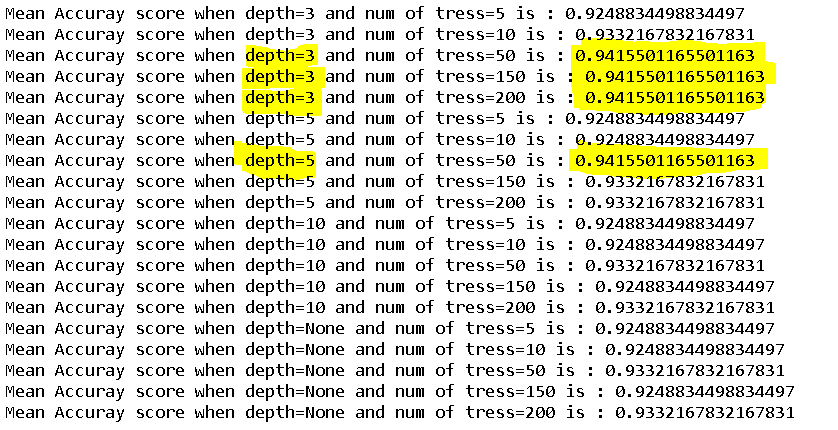

From the above heat diagram and results of Random Forest classifer model we can  notice that the maximum mean accuracy is provided when the max_depth is either 3(mostly) or 5(rarely).

Similar to Decision Tress alogorith Random forrest provides maximum accuracy when the max_Depth is 3.Unlike Decision tree when the max_depth is 5 random forest tends to give high accuracy as the number of tree's(50) decisions are considered for making teh prediction ,so the ambigious cases were predicted correctly in most of the cases.

### 5. Comment on the effect of the number of estimators for Gradient Tree Boosting and what was the relative effect performance of gradient boosting compared with random forest. Explain the reason for this.

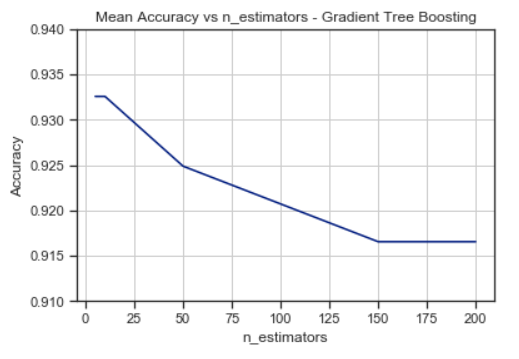

From the above graph of Mean Accuracy vs n_estimators for Gradient Tree Bosting ,we can notice that the accuracy is high when the number of estimators are either 5 or 10.


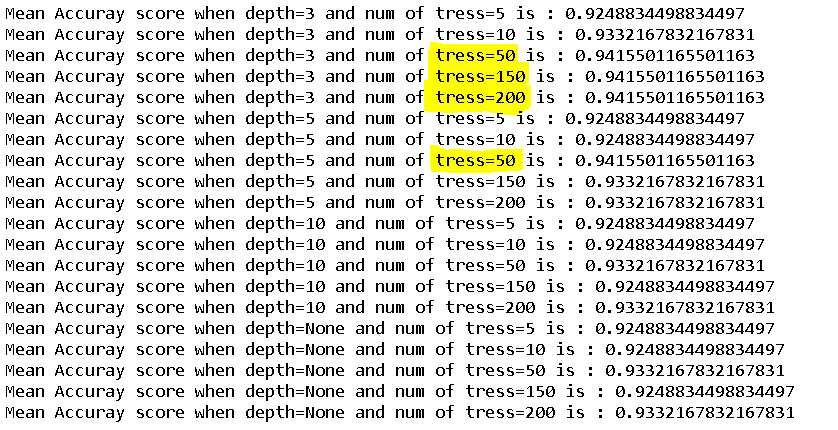

From the above results of Random Forest Tress classifer ,we can note that the maximum mean accuracy is given when the number of estimators/trees are either 50,150 and 200.

Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_/n_estimators regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function.

As gradient tress optimizes the differential loass functions sequentially ,it needs less number of estimators to get to high accuracy,where are in Random Forest Tress calssifier,the trees decisions are combined to come to a conclusion on the prediction.Hence less number of estimators are required for gradient boosting than the random forest classifier.

### 6. What does the parameter C define in the SVM classifier? What effect did you observe and why do you think this happened?

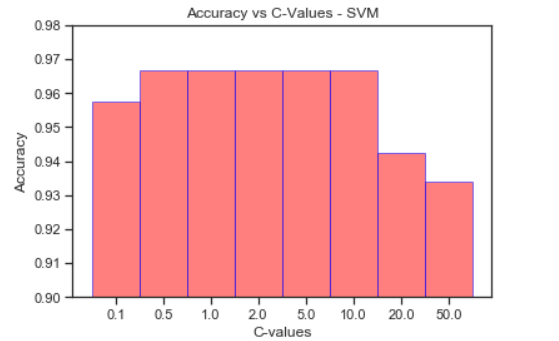

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words 'C' behaves as a regularization parameter in the SVM.

From the graph above we can observer that for the lower values of C, accuracy is better when comapred to that of higher C values.

When the C value incerases past 10(for this data set),the margin becomes very narrow ,that the prediction data points fall into other side og the dividing vector which results in the decrease of acuracy.

When the C value is low and hence the margin is greater enough to accomadate certain points inside in the margins to have a greater margin.Having greater margins ,lets the data points to be prdicted inside the margin and decied teh correct class ,rather than having a samll margin and making the data points fall to the opposite side.